## Project Report

----------------------------------

**5**

Earlier we had shown that woman tend to have higher mean Serum Cholestrol levels than men on average. But this might not necessarily be the case for all age groups.

The articles and research papers below point out the increased risk of cardiovascular disease as a result of increase Serum Cholestrol Level (primarily due to inceases in SCL). among woman after menopause. Our dataset could be used to provide evidence to refute or back up the claims of the article and its cited sources.

https://www.hopkinsmedicine.org/health/conditions-and-diseases/menopause-and-the-cardiovascular-system

https://time.com/6215450/how-menopause-affects-cholesterol/

https://pubmed.ncbi.nlm.nih.gov/2124647/#:~:text=Serum%20triglycerides%20and%20HDL%2Dcholesterol,observed%20in%20post%2Dmenopausal%20women.

In [ ]:
# The median age of menopuase for women in the United States is 51 years.
# We've used median and not mean, to eliminate the effects of any outliers.
menopause_age = 51

Let's plot a boxplot to see if this might be true. That woman after menopause have higher Serum Cholestrol levels than before.

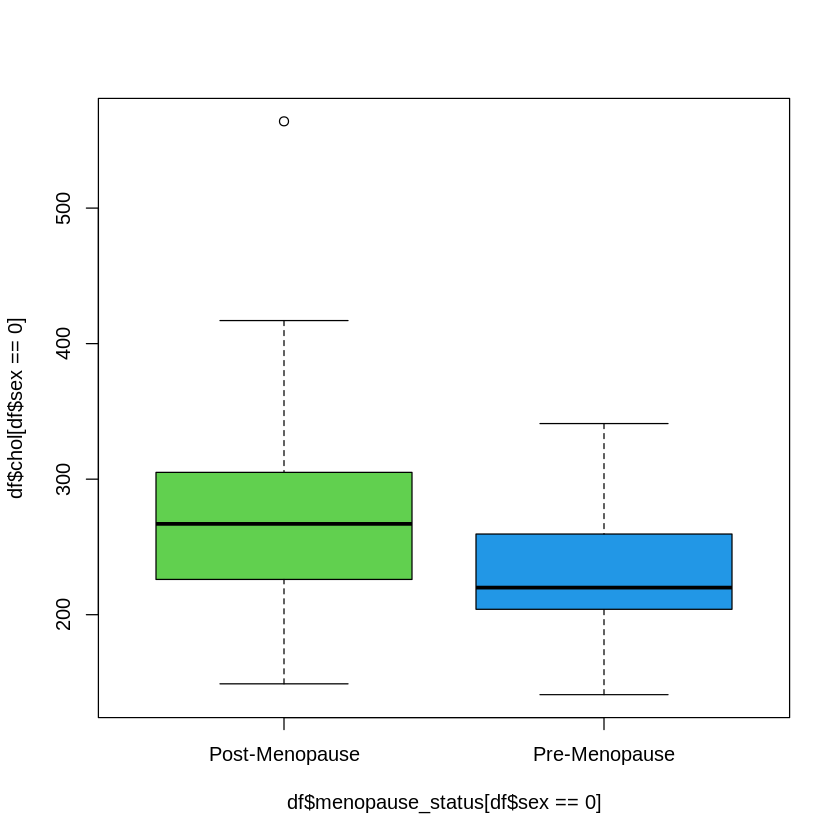

In [ ]:
# Create a new column to categorize women as pre/post-menopause
df$menopause_status = ifelse((df$sex == 0) & (df$age >= menopause_age), "Post-Menopause", "Pre-Menopause")

# Plot the boxplot
boxplot(df$chol[df$sex == 0] ~ df$menopause_status[df$sex == 0], col = c(3,4))

There seems to be quite a difference in the Serum Cholestrol level of woman pre and post menopause. Women seem to have a higher SCL post menopause.

And the difference seems to be pretty significant. So we'll use an independant sample t-test to test if there's truly a difference in the population means of the cholestrol levels of women and men before and after menopause.

In [ ]:
print(length(df$chol[(df$sex == 0) & (df$age >= menopause_age)]))
print(length(df$chol[(df$sex == 1) & (df$age >= menopause_age)]))

[1] 69
[1] 139


Since the number of woman and men above 51 is more than 30, we can assume that the central limit theorem has kicked in for the mean of he cholestrol levels of the groups.

Hence we'll be using the t-test for our study.

H_0: Woman have the same cholestrol levels before and after menopause.

H_1:  Woman don't have the same cholestrol levels before and after menopause.

In [ ]:
t.test(df$chol[(df$sex == 0) & (df$age >= menopause_age)],
       df$chol[(df$sex == 0) & (df$age < menopause_age)])


	Welch Two Sample t-test

data:  df$chol[(df$sex == 0) & (df$age >= menopause_age)] and df$chol[(df$sex == 0) & (df$age < menopause_age)]
t = 3.7489, df = 73.309, p-value = 0.000352
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 20.64097 67.49107
sample estimates:
mean of x mean of y 
 273.6957  229.6296 


If we assume that the mean cholestrol levels of woman after and before menopause is the same, then the likelihood of getting an observation of the means of the 2 groups at least as extreme as the one observed in the sample is 0.000352. Which is very low.


This suggests that we reject the null hypothesis and that woman after menopause have a greater SCL(due to the confidence interval) than before menopause.

Now we'll test to see if the sex difference in cholestrol levels persists before and/or after menopause.

So we can safely use the independant sample t-test for the means of the 2 groups.

H_0: Woman and men have the same average Serum cholestrol level after menopause in woman.

H_1: Woman and men have different average Serum cholestrol level after menopause in woman.

In [ ]:
t.test(df$chol[(df$sex == 1) & (df$age >= menopause_age)],
       df$chol[(df$sex == 0) & (df$age >= menopause_age)],
       paired = FALSE)


	Welch Two Sample t-test

data:  df$chol[(df$sex == 1) & (df$age >= menopause_age)] and df$chol[(df$sex == 0) & (df$age >= menopause_age)]
t = -3.4822, df = 95.468, p-value = 0.000752
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -48.98525 -13.41325
sample estimates:
mean of x mean of y 
 242.4964  273.6957 


We reject the null hypothesis, since the probability of gettting the mean values atleast as different as we got is very low(0.05) hence there's a difference in SCL of the 2 groups after menopause.

By the confidence intervals we can say that the woman on average have a greater cholestrol level than men after menopause.

Now testing for a difference before menopause

In [ ]:
print(length(df$chol[(df$sex == 0) & (df$age < menopause_age)]))
print(length(df$chol[(df$sex == 1) & (df$age < menopause_age)]))

[1] 27
[1] 68


The number of men under the median age of menopause in women is 68 which is greater than 30. So we can safely say that the central limit theorem has kicked in for the mean of the central limit theorem.

but this is not the case for women. We need to prove that the central limit theorem has started to take hold.

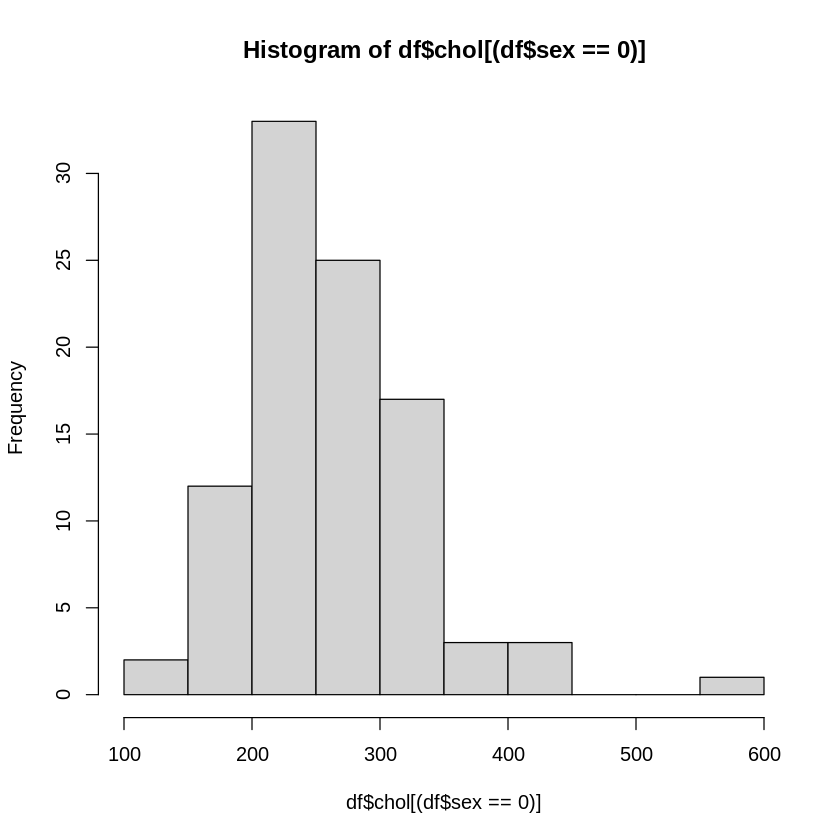

In [ ]:
hist(df$chol[(df$sex == 0)], breaks = 10)

We can see that the distribution is pretty normal to start off with. Consequently, it would be safe to assume that the means would assume a normal distribution at a much lower number than 30. We can assume that the entire dataset is a good estimate of the population since the data collection is randomized and there's a large amount of data values.

As a result we can safely assume that the mean cholestrol levels for women follows a normal distribution.

Hence we'll be using an independant sample t-test for means for our analysis.

H_0: Woman and men have the same average Serum cholestrol level before menopause in woman.

H_1: Woman and men have different average Serum cholestrol level before menopause in woman.

In [ ]:
t.test(df$chol[(df$sex == 1) & (df$age < menopause_age)],
       df$chol[(df$sex == 0) & (df$age < menopause_age)],
       paired = FALSE)


	Welch Two Sample t-test

data:  df$chol[(df$sex == 1) & (df$age < menopause_age)] and df$chol[(df$sex == 0) & (df$age < menopause_age)]
t = 0.31459, df = 46.427, p-value = 0.7545
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -16.76070  22.97203
sample estimates:
mean of x mean of y 
 232.7353  229.6296 


On assuming that the mean cholestrol levels for men and women before women is same, the probability of getting mean value of cholestrol for men and women at least as different we got is very high: 75.45%. Hence we fail to reject the assumption that woman and men have the same average Serum cholestrol level before menopause in woman.
